In [1]:
1. Internet Usage Analysis. 
This project is about the Data of internet usage [in kb] by graduate student at an indian university. 
Answer for the following questions using Data Analysis. 
What is the most frequent internet activity time of the day? 
How often the ip changes? How often the device changed?
What is the average usage per hour, per day and per month? 



In [58]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
internet_usage = pd.read_csv("internet_session.csv")
internet_usage 

name           start_time   usage_time            IP  \
0     user1  2022-05-10 02:59:32  00:00:36:28  10.55.14.222   
1     user1  2022-05-10 18:53:27  00:01:49:56   10.55.2.253   
2     user1  2022-05-10 21:20:44  00:01:35:00   10.55.2.253   
3     user1  2022-05-11 00:37:42  00:00:26:00   10.55.2.253   
4     user1  2022-05-11 02:59:38  00:00:11:52   10.55.2.253   
...     ...                  ...          ...           ...   
4707  user9  2022-11-04 01:11:34  00:06:54:32   10.55.4.189   
4708  user9  2022-11-04 10:26:09  00:00:23:49    10.55.4.59   
4709  user9  2022-11-04 20:41:42  00:01:24:13  10.55.15.186   
4710  user9  2022-11-05 00:21:06  00:08:49:43   10.55.4.159   
4711  user9  2022-11-05 20:55:37  00:01:06:20    10.55.2.33   

                    MAC     upload    download  total_transfer  \
0     48:E7:DA:58:22:E9   15861.76   333168.64       349030.40   
1     48:E7:DA:58:22:E9   16957.44   212152.32       229109.76   
2     48:E7:DA:58:22:E9    14080.0   195153.92       209233.92   
3     48:E7:DA:58:22:E9    5242.88     40806.4        46049.28   
4     48:E7:DA:58:22:E9    22067.2    10772.48        32839.68   
...                 ...        ...         ...             ...   
4707  DA:2F:97:0E:B7:D0  107960.32  2390753.28      2495610.88   
4708  DA:2F:97:0E:B7:D0   11407.36   209674.24       221081.60   
4709  DA:2F:97:0E:B7:D0    18995.2    373657.6       392652.80   
4710  DA:2F:97:0E:B7:D0   46602.24    593766.4       640368.64   
4711  DA:2F:97:0E:B7:D0   21237.76   298536.96       319774.72   

     seession_break_reason  
0             Idle-Timeout  
1             Idle-Timeout  
2             Idle-Timeout  
3             Idle-Timeout  
4             Idle-Timeout  
...                    ...  
4707          Idle-Timeout  
4708          Idle-Timeout  
4709          Idle-Timeout  
4710          Idle-Timeout  
4711                   NaN  

[4712 rows x 9 columns]

In [6]:
# Dataset is now stored in Pandas Dataframe 
internet_usage.describe 


<bound method NDFrame.describe of        name           start_time   usage_time            IP  \
0     user1  2022-05-10 02:59:32  00:00:36:28  10.55.14.222   
1     user1  2022-05-10 18:53:27  00:01:49:56   10.55.2.253   
2     user1  2022-05-10 21:20:44  00:01:35:00   10.55.2.253   
3     user1  2022-05-11 00:37:42  00:00:26:00   10.55.2.253   
4     user1  2022-05-11 02:59:38  00:00:11:52   10.55.2.253   
...     ...                  ...          ...           ...   
4707  user9  2022-11-04 01:11:34  00:06:54:32   10.55.4.189   
4708  user9  2022-11-04 10:26:09  00:00:23:49    10.55.4.59   
4709  user9  2022-11-04 20:41:42  00:01:24:13  10.55.15.186   
4710  user9  2022-11-05 00:21:06  00:08:49:43   10.55.4.159   
4711  user9  2022-11-05 20:55:37  00:01:06:20    10.55.2.33   

                    MAC     upload    download  total_transfer  \
0     48:E7:DA:58:22:E9   15861.76   333168.64       349030.40   
1     48:E7:DA:58:22:E9   16957.44   212152.32       229109.76   
2     48:E7

In [7]:
internet_usage.shape 


(4712, 9)

In [8]:
internet_usage.columns 


Index(['name', 'start_time', 'usage_time', 'IP', 'MAC', 'upload', 'download',
       'total_transfer', 'seession_break_reason'],
      dtype='object')

In [9]:
internet_usage.columns = internet_usage.columns.str.lower() 
internet_usage.columns 


Index(['name', 'start_time', 'usage_time', 'ip', 'mac', 'upload', 'download',
       'total_transfer', 'seession_break_reason'],
      dtype='object')

In [10]:
internet_usage.dtypes 


name                      object
start_time                object
usage_time                object
ip                        object
mac                       object
upload                    object
download                  object
total_transfer           float64
seession_break_reason     object
dtype: object

In [11]:
internet_usage.isna().sum() 

name                     0
start_time               0
usage_time               0
ip                       0
mac                      0
upload                   0
download                 0
total_transfer           0
seession_break_reason    9
dtype: int64

In [12]:
internet_usage = internet_usage.dropna().copy() 
internet_usage.isna().sum() 

name                     0
start_time               0
usage_time               0
ip                       0
mac                      0
upload                   0
download                 0
total_transfer           0
seession_break_reason    0
dtype: int64

In [13]:
internet_usage.duplicated().sum() 



0

In [14]:
internet_usage.describe(include='all', datetime_is_numeric=True) 

name           start_time   usage_time          ip  \
count    4703                 4703         4703        4703   
unique      9                 4029         3551        1299   
top     user4  2022-05-10 02:59:32  00:00:25:14  10.55.0.89   
freq      725                    2            7          80   
mean      NaN                  NaN          NaN         NaN   
std       NaN                  NaN          NaN         NaN   
min       NaN                  NaN          NaN         NaN   
25%       NaN                  NaN          NaN         NaN   
50%       NaN                  NaN          NaN         NaN   
75%       NaN                  NaN          NaN         NaN   
max       NaN                  NaN          NaN         NaN   

                      mac  upload   download  total_transfer  \
count                4703    4703       4703    4.703000e+03   
unique                 33    2913       3724             NaN   
top     48:E7:DA:58:22:E9  5222.4  1310720.0             NaN   
freq                 1235       8         10             NaN   
mean                  NaN     NaN        NaN    4.304372e+05   
std                   NaN     NaN        NaN    9.960848e+05   
min                   NaN     NaN        NaN    1.120000e+00   
25%                   NaN     NaN        NaN    6.187008e+04   
50%                   NaN     NaN        NaN    2.027930e+05   
75%                   NaN     NaN        NaN    4.993997e+05   
max                   NaN     NaN        NaN    2.855272e+07   

       seession_break_reason  
count                   4703  
unique                     5  
top             Idle-Timeout  
freq                    4350  
mean                     NaN  
std                      NaN  
min                      NaN  
25%                      NaN  
50%                      NaN  
75%                      NaN  
max                      NaN

In [21]:
internet_usage.name.value_counts()



user4    725
user6    674
user1    673
user9    571
user7    526
user3    518
user2    456
user5    335
user8    225
Name: name, dtype: int64

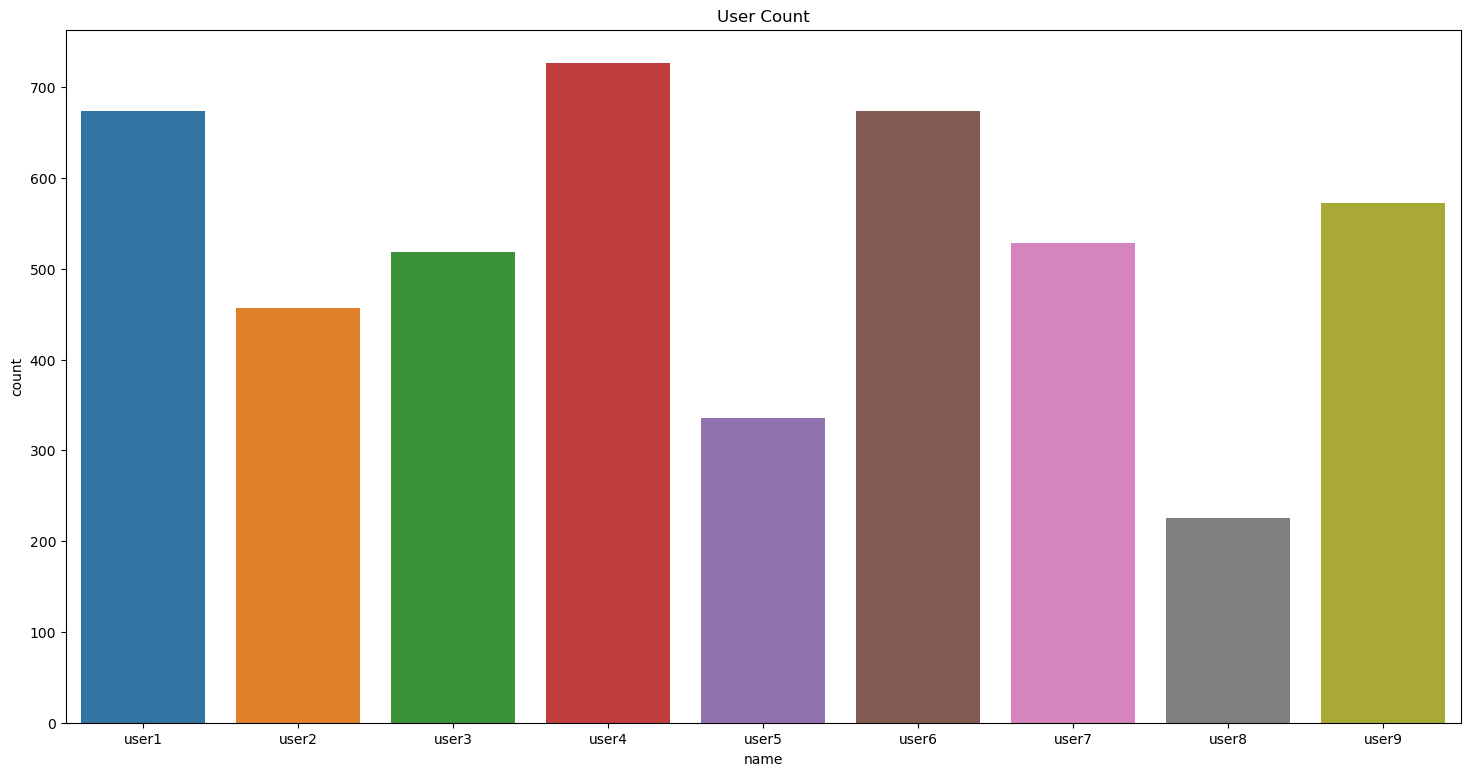

<Figure size 640x480 with 0 Axes>

In [56]:
plt.figure(figsize=(18, 9)) 
ax = sns.countplot(x='name', data=internet_usage) 
plt.title("User Count") 
plt.show() 
plt.clf() 

In [23]:
print('The earliest start time is:')
print(internet_usage.start_time.min())
print('The latest start time is:') 
print(internet_usage.start_time.max()) 

The earliest start time is:
2022-05-09 22:52:41
The latest start time is:
2022-11-05 18:41:14


In [25]:
print('The minimum usage time is:') 
print(internet_usage.usage_time.min())
print('The maximum usage time is:')
print(internet_usage.usage_time.max()) 


The minimum usage time is:
00:00:00:01
The maximum usage time is:
01:00:21:07


In [27]:
print("The minimum usage time per user:") 
usage_time_minimum = internet_usage.groupby('name').usage_time.min() 
usage_time_minimum 


The minimum usage time per user:


name
user1    00:00:00:18
user2    00:00:00:08
user3    00:00:00:01
user4    00:00:00:45
user5    00:00:01:07
user6    00:00:00:18
user7    00:00:00:20
user8    00:00:00:20
user9    00:00:00:09
Name: usage_time, dtype: object

In [29]:
print('The maximum usage time per user:') 
usage_time_maximum = internet_usage.groupby('name').usage_time.max() 
usage_time_maximum 


The maximum usage time per user:


name
user1    00:19:35:11
user2    00:20:39:52
user3    00:17:01:28
user4    01:00:21:07
user5    00:06:36:11
user6    00:19:35:11
user7    00:22:00:07
user8    00:17:24:26
user9    00:19:26:09
Name: usage_time, dtype: object

In [54]:
internet_usage = pd.read_csv("internet_session.csv")
internet_usage 

name           start_time   usage_time            IP  \
0     user1  2022-05-10 02:59:32  00:00:36:28  10.55.14.222   
1     user1  2022-05-10 18:53:27  00:01:49:56   10.55.2.253   
2     user1  2022-05-10 21:20:44  00:01:35:00   10.55.2.253   
3     user1  2022-05-11 00:37:42  00:00:26:00   10.55.2.253   
4     user1  2022-05-11 02:59:38  00:00:11:52   10.55.2.253   
...     ...                  ...          ...           ...   
4707  user9  2022-11-04 01:11:34  00:06:54:32   10.55.4.189   
4708  user9  2022-11-04 10:26:09  00:00:23:49    10.55.4.59   
4709  user9  2022-11-04 20:41:42  00:01:24:13  10.55.15.186   
4710  user9  2022-11-05 00:21:06  00:08:49:43   10.55.4.159   
4711  user9  2022-11-05 20:55:37  00:01:06:20    10.55.2.33   

                    MAC     upload    download  total_transfer  \
0     48:E7:DA:58:22:E9   15861.76   333168.64       349030.40   
1     48:E7:DA:58:22:E9   16957.44   212152.32       229109.76   
2     48:E7:DA:58:22:E9    14080.0   195153.92       209233.92   
3     48:E7:DA:58:22:E9    5242.88     40806.4        46049.28   
4     48:E7:DA:58:22:E9    22067.2    10772.48        32839.68   
...                 ...        ...         ...             ...   
4707  DA:2F:97:0E:B7:D0  107960.32  2390753.28      2495610.88   
4708  DA:2F:97:0E:B7:D0   11407.36   209674.24       221081.60   
4709  DA:2F:97:0E:B7:D0    18995.2    373657.6       392652.80   
4710  DA:2F:97:0E:B7:D0   46602.24    593766.4       640368.64   
4711  DA:2F:97:0E:B7:D0   21237.76   298536.96       319774.72   

     seession_break_reason  
0             Idle-Timeout  
1             Idle-Timeout  
2             Idle-Timeout  
3             Idle-Timeout  
4             Idle-Timeout  
...                    ...  
4707          Idle-Timeout  
4708          Idle-Timeout  
4709          Idle-Timeout  
4710          Idle-Timeout  
4711                   NaN  

[4712 rows x 9 columns]

In [55]:
internet_usage.IP.value_counts() 


10.55.0.89      80
10.55.14.148    64
10.55.15.221    55
10.55.1.50      48
10.55.10.46     44
                ..
10.55.14.67      1
10.55.7.44       1
10.55.12.225     1
10.55.12.190     1
10.55.2.33       1
Name: IP, Length: 1302, dtype: int64

In [35]:
print('The minimum upload is: ' + str(internet_usage.upload.min()) + 'Kb') 
print('The maximum upload is: ' + str(internet_usage.upload.max()) + 'Kb') 


The minimum upload is: 10004.48Kb
The maximum upload is: 9994.24Kb


In [38]:
print('The minimum upload per user:')
internet_usage.groupby('name').upload.min() 


The minimum upload per user:


name
user1      1006.74
user2     10117.12
user3     10055.68
user4     10147.84
user5     10076.16
user6      1006.74
user7      10035.2
user8     10004.48
user9    100720.64
Name: upload, dtype: object

In [37]:
print('The maximum upload per user:') 
internet_usage.groupby('name').upload.max() 

The maximum upload per user:


name
user1      9932.8
user2     9994.24
user3    99860.48
user4     9963.52
user5     9973.76
user6      9932.8
user7    99860.48
user8     9922.56
user9     9963.52
Name: upload, dtype: object

In [39]:
print('The minimum download is:  ' + str(internet_usage.download.min()) + 'Kb') 
print('The maximum download is: ' + str(internet_usage.download.max()) + 'Kb') 

The minimum download is:  100014.08Kb
The maximum download is: 999393.28Kb


In [41]:
print('The minimum download per user:') 
internet_usage.groupby('name').download.min() 

The minimum download per user:


name
user1    100167.68
user2      10035.2
user3     100044.8
user4    100055.04
user5     10076.16
user6    100167.68
user7    100014.08
user8    101672.96
user9    1001216.0
Name: download, dtype: object

In [42]:
print('The maximum download per user:') 
internet_usage.groupby('name').download.max() 


The maximum download per user:


name
user1    999393.28
user2     99676.16
user3      99635.2
user4      9953.28
user5    990812.16
user6    999393.28
user7    984227.84
user8     97884.16
user9       9984.0
Name: download, dtype: object

In [43]:
print('The minimum total transfer is: ' + str(internet_usage.total_transfer.min()) + 'Kb') 
print('The maximum total transfer is: ' + str(internet_usage.total_transfer.max()) + 'Kb') 


The minimum total transfer is: 1.12Kb
The maximum total transfer is: 28552724.48Kb


In [44]:
print('The minimum total transfer per user:')
internet_usage.groupby('name').total_transfer.min() 


The minimum total transfer per user:


name
user1     75.34
user2     73.13
user3      1.12
user4     13.45
user5    924.40
user6     75.34
user7     15.25
user8     18.08
user9    102.64
Name: total_transfer, dtype: float64

In [45]:
print('The maximum total transfer per user:') 
internet_usage.groupby('name').total_transfer.max() 

The maximum total transfer per user:


name
user1    24389877.76
user2    22051553.28
user3     3282042.88
user4     8524922.88
user5     5158993.92
user6    24389877.76
user7    28552724.48
user8     3166699.52
user9     6155141.12
Name: total_transfer, dtype: float64

In [46]:
internet_usage.seession_break_reason.value_counts() 


Idle-Timeout    4350
Lost-Carrier     162
Lost-Service     124
User-Request      65
NAS-Reboot         2
Name: seession_break_reason, dtype: int64

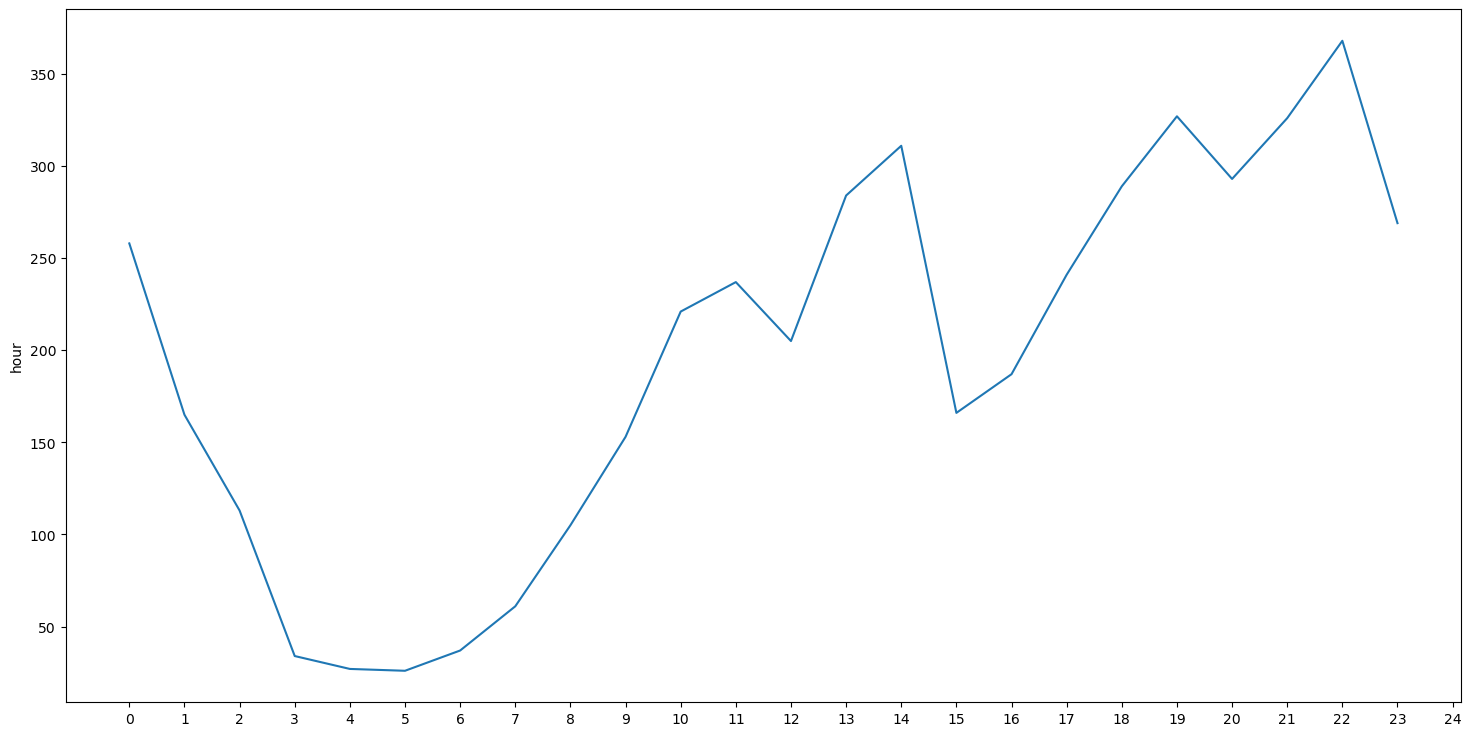

<Figure size 640x480 with 0 Axes>

In [49]:
"What is the most frequent internet activity time of the day?"



internet_usage['hour'] = pd.to_datetime(internet_usage['start_time']).dt.hour
frequent_activity_time_of_day = internet_usage['hour'].value_counts().sort_index() 
plt.figure(figsize=(18,9)) 
sns.lineplot(data=frequent_activity_time_of_day) 
plt.xticks(np.linspace(start=0, stop=24, num=25)) 
plt.show()
plt.clf() 



In [52]:
internet_usage = pd.read_csv("internet_session.csv")
internet_usage 

name           start_time   usage_time            IP  \
0     user1  2022-05-10 02:59:32  00:00:36:28  10.55.14.222   
1     user1  2022-05-10 18:53:27  00:01:49:56   10.55.2.253   
2     user1  2022-05-10 21:20:44  00:01:35:00   10.55.2.253   
3     user1  2022-05-11 00:37:42  00:00:26:00   10.55.2.253   
4     user1  2022-05-11 02:59:38  00:00:11:52   10.55.2.253   
...     ...                  ...          ...           ...   
4707  user9  2022-11-04 01:11:34  00:06:54:32   10.55.4.189   
4708  user9  2022-11-04 10:26:09  00:00:23:49    10.55.4.59   
4709  user9  2022-11-04 20:41:42  00:01:24:13  10.55.15.186   
4710  user9  2022-11-05 00:21:06  00:08:49:43   10.55.4.159   
4711  user9  2022-11-05 20:55:37  00:01:06:20    10.55.2.33   

                    MAC     upload    download  total_transfer  \
0     48:E7:DA:58:22:E9   15861.76   333168.64       349030.40   
1     48:E7:DA:58:22:E9   16957.44   212152.32       229109.76   
2     48:E7:DA:58:22:E9    14080.0   195153.92       209233.92   
3     48:E7:DA:58:22:E9    5242.88     40806.4        46049.28   
4     48:E7:DA:58:22:E9    22067.2    10772.48        32839.68   
...                 ...        ...         ...             ...   
4707  DA:2F:97:0E:B7:D0  107960.32  2390753.28      2495610.88   
4708  DA:2F:97:0E:B7:D0   11407.36   209674.24       221081.60   
4709  DA:2F:97:0E:B7:D0    18995.2    373657.6       392652.80   
4710  DA:2F:97:0E:B7:D0   46602.24    593766.4       640368.64   
4711  DA:2F:97:0E:B7:D0   21237.76   298536.96       319774.72   

     seession_break_reason  
0             Idle-Timeout  
1             Idle-Timeout  
2             Idle-Timeout  
3             Idle-Timeout  
4             Idle-Timeout  
...                    ...  
4707          Idle-Timeout  
4708          Idle-Timeout  
4709          Idle-Timeout  
4710          Idle-Timeout  
4711                   NaN  

[4712 rows x 9 columns]

In [53]:
"How often the ip changes?" 




base_IP= '48:E7:DA:58:22:E9' 
IP_count = 0 
for i in range(1, internet_usage.shape[0]): 
    if internet_usage.iloc[i]['IP'] != base_IP: 
        IP_count +=1 
        base_IP= internet_usage.iloc[i]['IP'] 
        
print('The IP Adress changed ' + str(IP_count) + ' times') 


The IP Adress changed 2308 times


In [ ]:
The dataset contains 9 users that used 1224 difference devices to connect to the internet while uploading 2841640.0Kb and downloading 27902607.0Kb with a total transfer of 28552724.48Kb during a period of 7 months 

The most frequent internet activity time of the day is 22h or 10pm 

The IP Adress changed 2303 times while the devices used changed 1223 times 

The highest average usage per hour was 666590.76Kb around 18h or 6pm, the highest average usage per day was 729857.65Kb around the 11th day of the month, while the highest average usage per month was during the month of October with 549467.63Kb total transfer of data 
